In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


train_data = pd.read_csv("/content/drive/MyDrive/Pixies/fraudTrain.csv")
test_data = pd.read_csv("/content/drive/MyDrive/Pixies/fraudTest.csv")


selected_columns = [
    "amt", "merchant", "category", "lat", "long",
    "city_pop", "unix_time", "merch_lat", "merch_long"
]

X_train = train_data[selected_columns]
y_train = train_data["is_fraud"]

X_test = test_data[selected_columns]
y_test = test_data["is_fraud"]


X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)


X_train, X_test = X_train.align(X_test, join="left", axis=1, fill_value=0)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9973817702831826
Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.78      0.45      0.57      2145

    accuracy                           1.00    555719
   macro avg       0.89      0.72      0.78    555719
weighted avg       1.00      1.00      1.00    555719



In [ ]:
import joblib

joblib.dump(model, "fraud_detection_model.pkl")
print("Model saved as fraud_detection_model.pkl")


loaded_model = joblib.load("fraud_detection_model.pkl")


y_pred_loaded = loaded_model.predict(X_test)
print("Accuracy (loaded model):", accuracy_score(y_test, y_pred_loaded))

Model saved as fraud_detection_model.pkl
Accuracy (loaded model): 0.9973817702831826


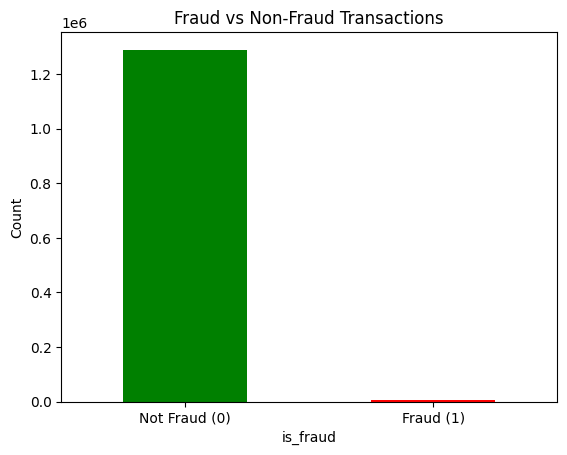

In [ ]:
import matplotlib.pyplot as plt

train_data["is_fraud"].value_counts().plot(kind="bar", color=["green", "red"])
plt.title("Fraud vs Non-Fraud Transactions")
plt.xticks([0,1], ["Not Fraud (0)", "Fraud (1)"], rotation=0)
plt.ylabel("Count")
plt.show()

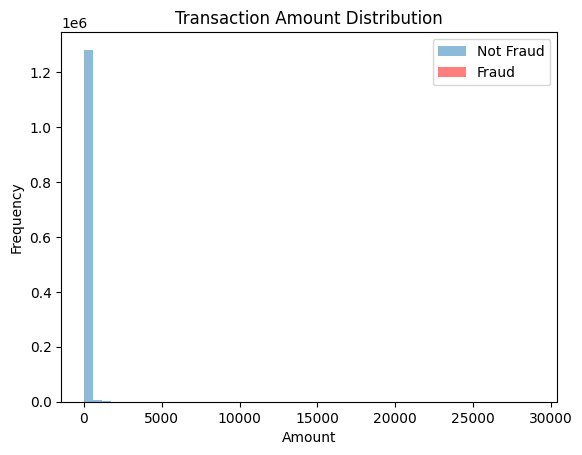

In [ ]:
train_data[train_data["is_fraud"]==0]["amt"].plot(kind="hist", bins=50, alpha=0.5, label="Not Fraud")
train_data[train_data["is_fraud"]==1]["amt"].plot(kind="hist", bins=50, alpha=0.5, label="Fraud", color="red")
plt.legend()
plt.title("Transaction Amount Distribution")
plt.xlabel("Amount")
plt.show()

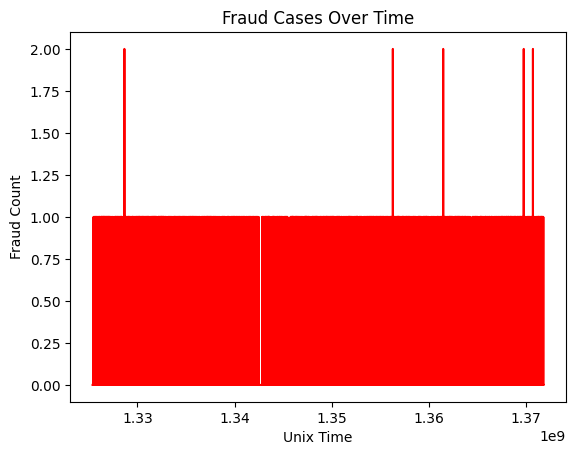

In [ ]:
fraud_over_time = train_data.groupby("unix_time")["is_fraud"].sum()

plt.plot(fraud_over_time.index, fraud_over_time.values, color="red")
plt.title("Fraud Cases Over Time")
plt.xlabel("Unix Time")
plt.ylabel("Fraud Count")
plt.show()

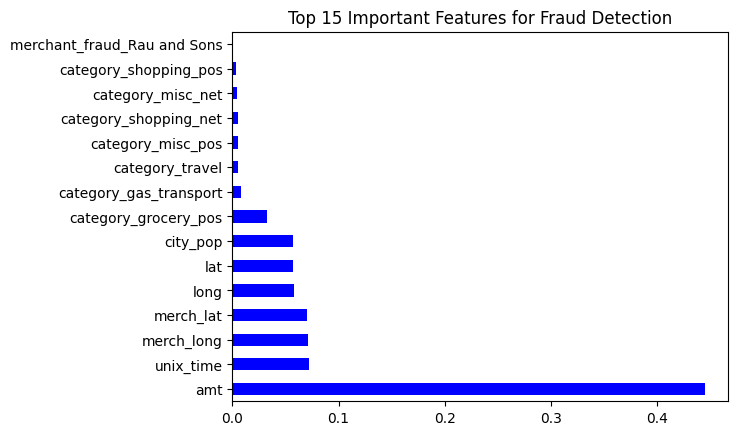

In [ ]:
import pandas as pd
import numpy as np

# Get feature importance from the trained model
importances = model.feature_importances_
features = X_train.columns

feat_importance = pd.Series(importances, index=features).sort_values(ascending=False)[:15]

feat_importance.plot(kind="barh", color="blue")
plt.title("Top 15 Important Features for Fraud Detection")
plt.show()

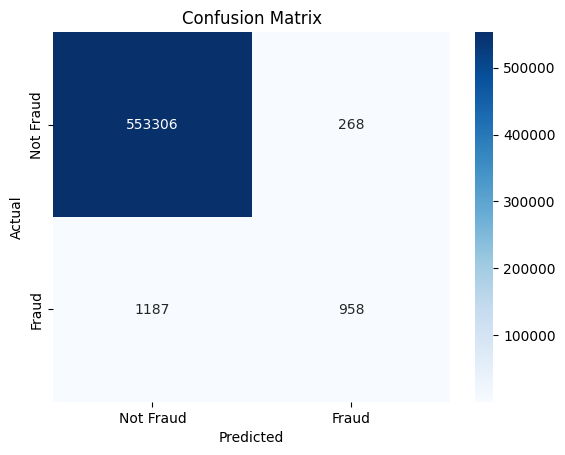

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Not Fraud", "Fraud"],
            yticklabels=["Not Fraud", "Fraud"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
!ls

drive  fraud_detection_model.pkl  sample_data


In [12]:
# Create a zip file with your notebook, predictions, and plots folder
!zip -r project_files.zip Pixies_fraudDetection.ipynb predictions.csv plots/

# Download the zip to your local machine
from google.colab import files
files.download("project_files.zip")

	zip warning: name not matched: Pixies_fraudDetection.ipynb
	zip warning: name not matched: predictions.csv
	zip warning: name not matched: plots/

zip error: Nothing to do! (try: zip -r project_files.zip . -i Pixies_fraudDetection.ipynb predictions.csv plots/)


FileNotFoundError: Cannot find file: project_files.zip

In [13]:
!ls -lh

total 143M
drwx------ 5 root root 4.0K Aug 31 11:13 drive
-rw-r--r-- 1 root root 143M Aug 31 11:38 fraud_detection_model.pkl
drwxr-xr-x 1 root root 4.0K Aug 28 13:43 sample_data


In [14]:
predictions.to_csv("predictions.csv", index=False)

from google.colab import files
files.download("predictions.csv")

NameError: name 'predictions' is not defined

In [15]:
import matplotlib.pyplot as plt

# after plotting each graph
plt.savefig("roc_curve.png")
plt.savefig("confusion_matrix.png")
plt.savefig("pr_curve.png")

<Figure size 640x480 with 0 Axes>